In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
import os
from torchvision.transforms import RandomErasing
from torch.utils.data import ConcatDataset
from torchviz import make_dot



batch_multi = 1

def load_flowers102():
    
    transformTrain1 = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

    transformTrain2 = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(50),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1.5)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

    transformTrain3 = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(80),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

    transformTrain4 = transforms.Compose([
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Transform Train 5
    transformTrain5 = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.RandomRotation(60),
    transforms.RandomAffine(degrees=20, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Transform Train 6
    transformTrain6 = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomGrayscale(p=0.2),
    transforms.RandomPerspective(distortion_scale=0.3, p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Transform Train 7
    transformTrain7 = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomRotation(70),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Transform Train 8
    transformTrain8 = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Transform Train 9
    transformTrain9 = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomVerticalFlip(),
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Transform Train 10
    transformTrain10 = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomRotation(90),
    transforms.RandomAffine(degrees=25, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


    transformTest = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


    train_dataset1 = torchvision.datasets.Flowers102(root='flowers102data', split='train', download=True, transform=transformTrain1)
    train_dataset2 = torchvision.datasets.Flowers102(root='flowers102data', split='train', download=True, transform=transformTrain2)
    train_dataset3 = torchvision.datasets.Flowers102(root='flowers102data', split='train', download=True, transform=transformTrain3)
    train_dataset4 = torchvision.datasets.Flowers102(root='flowers102data', split='train', download=True, transform=transformTrain4)
    train_dataset5 = torchvision.datasets.Flowers102(root='flowers102data', split='train', download=True, transform=transformTrain5)
    train_dataset6 = torchvision.datasets.Flowers102(root='flowers102data', split='train', download=True, transform=transformTrain6)
    train_dataset7 = torchvision.datasets.Flowers102(root='flowers102data', split='train', download=True, transform=transformTrain7)
    train_dataset8 = torchvision.datasets.Flowers102(root='flowers102data', split='train', download=True, transform=transformTrain8)
    train_dataset9 = torchvision.datasets.Flowers102(root='flowers102data', split='train', download=True, transform=transformTrain9)
    train_dataset10 = torchvision.datasets.Flowers102(root='flowers102data', split='train', download=True, transform=transformTrain10)
    train_dataset = ConcatDataset([train_dataset1, train_dataset2, train_dataset3, train_dataset4, train_dataset5, train_dataset6, train_dataset7, train_dataset8, train_dataset9, train_dataset10])
    test_dataset = torchvision.datasets.Flowers102(root='flowers102data', split='test', download=True, transform=transformTest)
    validation_dataset = torchvision.datasets.Flowers102(root='flowers102data', split='val', download=True, transform=transformTest)

    train_loader = DataLoader(train_dataset, batch_size=int(32 * batch_multi), shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=int(32 * batch_multi), shuffle=False)
    validation_loader = DataLoader(validation_dataset, batch_size=int(32 * batch_multi), shuffle=False)

    return train_loader, test_loader, validation_loader


In [2]:
def set_device():
    if torch.cuda.is_available():
      print('cuda')
      return torch.device("cuda")
    if torch.backends.mps.is_available():
        return torch.device("mps")
    else:
        return torch.device("cpu") 


device = set_device()


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class simpleCNN(nn.Module):
    def __init__(self):
        super(simpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv4 = nn.Conv2d(256, 512, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(512 * 14 * 14, 1024)  
        self.fc2 = nn.Linear(1024, 102)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout1(x)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [4]:
import matplotlib.pyplot as plt

def train_model(model, train_loader, validation_loader, criterion, optimizer, scheduler, patience=5, num_epochs=10):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    current_patience = 0

    for epoch in range(num_epochs):
        total_train_loss = 0
        total_val_loss = 0

        # Training phase
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        # Validation phase
        model.eval()
        with torch.no_grad():
            for images, labels in validation_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        avg_val_loss = total_val_loss / len(validation_loader)

        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        print(f'Epoch {epoch+1}: Training Loss = {avg_train_loss}, Validation Loss = {avg_val_loss}')


        scheduler.step(avg_val_loss)

        current_lr = scheduler.optimizer.param_groups[0]['lr']
        print(f"Current Learning Rate: {current_lr}")


        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            current_patience = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            current_patience += 1
            if current_patience >= patience:
                print("Early stopping triggered!")
                break


    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model


In [5]:
def test_model(model, test_loader):
    model.eval()  
    total_correct = 0
    total_images = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_correct += (predicted == labels).sum().item()
            total_images += labels.size(0)
    print(f'Accuracy: {total_correct / total_images * 100:.2f}%')

/Users/williampotts/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1: Training Loss = 4.087544796982529, Validation Loss = 3.589310348033905
Current Learning Rate: 0.0003
Epoch 2: Training Loss = 3.624645325083718, Validation Loss = 3.1203341595828533
Current Learning Rate: 0.0003
Epoch 3: Training Loss = 3.2415090937599493, Validation Loss = 2.7607107125222683
Current Learning Rate: 0.0003
Epoch 4: Training Loss = 2.927182942722285, Validation Loss = 2.525042749941349
Current Learning Rate: 0.0003
Epoch 5: Training Loss = 2.682739469324907, Validation Loss = 2.3723890837281942
Current Learning Rate: 0.0003
Epoch 6: Training Loss = 2.448942343269396, Validation Loss = 2.2804202679544687
Current Learning Rate: 0.0003
Epoch 7: Training Loss = 2.2606191821980253, Validation Loss = 2.3000945542007685
Current Learning Rate: 0.0003
Epoch 8: Training Loss = 2.0904053487000422, Validation Loss = 2.1291305040940642
Current Learning Rate: 0.0003
Epoch 9: Training Loss = 1.9499965663240248, Validation Loss = 2.166253169067204
Current Learning Rate: 0.0003


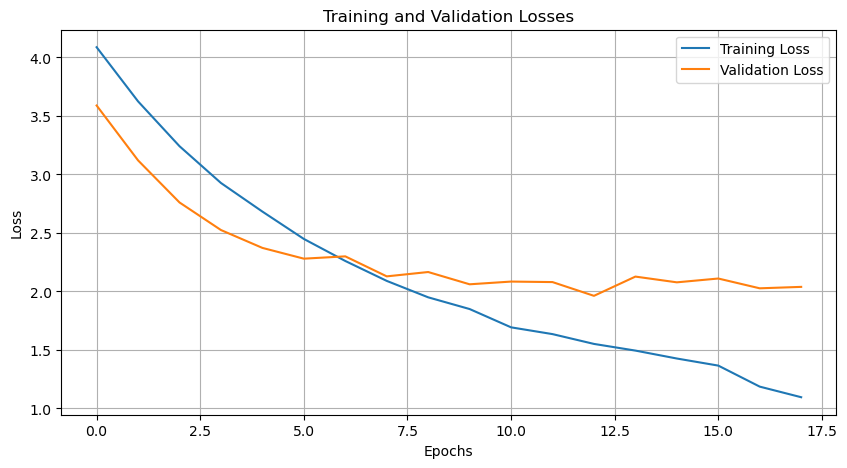

simpleCNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=100352, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=102, bias=True)
)

In [6]:

model = simpleCNN()
model.to(device)  
optimizer = optim.Adam(model.parameters(), lr=0.0003)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

train_loader, test_loader, validation_loader = load_flowers102()
train_model(model, train_loader, validation_loader, criterion, optimizer, scheduler, patience=5, num_epochs=200)


In [9]:
model = simpleCNN()
model.load_state_dict(torch.load('best_model.pth'))
model.to(device)

simpleCNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=100352, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=102, bias=True)
)

In [10]:
test_model(model, test_loader)

Accuracy: 50.35%


In [ ]:
from PIL import Image
import torchvision.transforms as transforms

def test_single_image(model, image_path, transform):
    model.eval()  
    image = Image.open(image_path)  
    image = transform(image).unsqueeze(0)  
    image = image.to(device)  

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs.data, 1)  
    return predicted.item()

In [ ]:
image_path = 'flowers102data/flowers-102/jpg/image_05954.jpg'
transformTest = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
model.to(device)  
predicted_class = test_single_image(model, image_path, transformTest)
print(f'Predicted Class: {predicted_class}')


import os
from scipy.io import loadmat


image_directory = 'flowers102data/flowers-102/jpg'
label_file = 'imagelabels.mat'


image_files = sorted(os.listdir(image_directory))


labels_mat = loadmat(label_file)



image_name = os.path.basename(image_path)


image_index = image_files.index(image_name)

actual_label = labels[image_index] -1
print(f'Actual Class for {image_name}: {actual_label}')

Predicted Class: 18
Actual Class for image_05954.jpg: 67


In [34]:
model = simpleCNN().to(device)
dummy_input = torch.randn(1, 3, 224, 224).to(device)
output = model(dummy_input)
dot = make_dot(output, params=dict(model.named_parameters()))
dot.format = 'png'
dot.render('model_diagram')

python(71626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


'model_diagram.png'